In [ ]:
# default_exp models.error_dist

# Error Distributions
> distribution of logT - mean in AFT models

In order to get the distribution of $T$ we can use change of variable theorem:
$$
\begin{aligned}
\xi &= \log T - \mu\\
\frac{d\xi}{dT} &= \frac{1}{T}\\
p(T) &= p(\log(T) - \mu|\theta)\frac{d\xi}{dT}
\end{aligned}
$$

In [ ]:
#export
from functools import partial

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# hide
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

%matplotlib inline

## Gumbel Distributed Error

Suppose that the error is [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distributed, $\xi_i\sim Gumbel(1)$.

$$
\begin{aligned}
p(\xi) &= \exp(-\xi - \exp(-\xi))\\
p(T) &= \exp(-(\log T - \mu) - \exp(-(\log T - \mu)))\times\frac{1}{T}\\
p(T) &= \frac{1}{T}\exp\left(\mu-\frac{1}{T}\exp(\mu)\right)\times\frac{1}{T}\\
p(T) &\propto \left(\frac{1}{T}\right)^2\exp\left(-\frac{1}{T}\exp(\mu)\right)
\end{aligned}
$$
Therefore, $T$ is [Inverse Gamma](https://en.wikipedia.org/wiki/Inverse-gamma_distribution) distributed, such that $T\sim IG(1, \exp(\mu))$. The survival function in this case is (by using the identities that $\Gamma(1) = 1$ and $\Gamma(1,x) = \exp(-x)$:
$$
\begin{aligned}
p(T>t) &= 1 - \frac{\Gamma(1, \exp(\mu)/t)}{\Gamma(1)}\\
p(T>t) &= 1 - \exp\left(-\frac{\exp(\mu)}{t}\right)
\end{aligned}
$$

In [ ]:
# export
def get_distribution(dist:str):
    """
    Get the logpdf and logcdf of a given torch distribution
    """
    dist = getattr(torch.distributions, dist.title())
    if not isinstance(dist.support, torch.distributions.constraints._Real):
        raise Exception("Distribution needs support over ALL real values.")
        
    dist = partial(dist, loc=0.0)

    def dist_logpdf(ξ, σ):
        return dist(scale=σ).log_prob(ξ)

    def dist_logicdf(ξ, σ):
        """
        log of inverse cumulative distribution function
        """
        return torch.log(1 - dist(scale=σ).cdf(ξ))

    return dist_logpdf, dist_logicdf

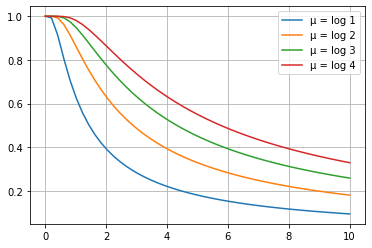

In [ ]:
_, logicdf = get_distribution("Gumbel")
μs = np.log(np.arange(1, 5))
t = np.linspace(1e-3, 10)
for μ in μs:
    logT = np.log(t)
    ξ = torch.Tensor(logT - μ)
    S = torch.exp(logicdf(torch.Tensor(ξ), 1))
    plt.plot(t, S, label=f'μ = log {int(np.exp(μ))}')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_index.ipynb.
Converted 10_SAT.ipynb.
Converted 20_KaplanMeier.ipynb.
Converted 30_overall_model.ipynb.
Converted 50_hazard.ipynb.
Converted 55_hazard.PiecewiseHazard.ipynb.
Converted 59_hazard.Cox.ipynb.
Converted 60_AFT_models.ipynb.
Converted 65_AFT_error_distributions.ipynb.
Converted 80_data.ipynb.
Converted 90_model.ipynb.
Converted 95_Losses.ipynb.
